#Install & Import Libraries

In [1]:
!pip install librosa

In [2]:
!pip install seaborn

In [3]:
import librosa, librosa.display

In [4]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import soundfile as sf

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#Download & Prepare The Training Data

In [5]:
!kaggle datasets download -d mmoreaux/audio-cats-and-dogs

Dataset URL: https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs
License(s): CC-BY-SA-3.0
100% 97.0M/97.0M [00:03<00:00, 29.5MB/s]
100% 97.0M/97.0M [00:03<00:00, 26.6MB/s]


In [6]:
! unzip audio-cats-and-dogs.zip

Archive:  audio-cats-and-dogs.zip
  inflating: cats_dogs/cat_1.wav     
  inflating: cats_dogs/cat_10.wav    
  inflating: cats_dogs/cat_100.wav   
  inflating: cats_dogs/cat_101.wav   
  inflating: cats_dogs/cat_102.wav   
  inflating: cats_dogs/cat_103.wav   
  inflating: cats_dogs/cat_105.wav   
  inflating: cats_dogs/cat_106.wav   
  inflating: cats_dogs/cat_107.wav   
  inflating: cats_dogs/cat_108.wav   
  inflating: cats_dogs/cat_109.wav   
  inflating: cats_dogs/cat_11.wav    
  inflating: cats_dogs/cat_110.wav   
  inflating: cats_dogs/cat_112.wav   
  inflating: cats_dogs/cat_113.wav   
  inflating: cats_dogs/cat_114.wav   
  inflating: cats_dogs/cat_115.wav   
  inflating: cats_dogs/cat_116.wav   
  inflating: cats_dogs/cat_117.wav   
  inflating: cats_dogs/cat_118.wav   
  inflating: cats_dogs/cat_119.wav   
  inflating: cats_dogs/cat_12.wav    
  inflating: cats_dogs/cat_120.wav   
  inflating: cats_dogs/cat_121.wav   
  inflating: cats_dogs/cat_122.wav   
  inflating: cat

In [7]:
directory_list = os.listdir('/content/cats_dogs/train')
print(directory_list)

['dog', 'cat']


In [8]:
# Prepare lists to hold emotions and file paths
animals = []
paths = []

# Process each actor directory
for animal in directory_list:
    animal_path = os.path.join('/content/cats_dogs/train', animal)
    animal_files = os.listdir(animal_path)

    # Process each audio file in the animal's directory
    for audio_file in animal_files:

        # Append the animal and file path to the respective lists
        animals.append(animal)
        paths.append(os.path.join(animal_path, audio_file))

# Create a DataFrame from the lists
data_df = pd.DataFrame({
    'animals': animals,
    'path': paths
})


# Display the first few and last few rows of the DataFrame together
head_and_tail = pd.concat([data_df.head(), data_df.tail()])
print("First and last few rows of the DataFrame:")
print(head_and_tail)

# Display a summary of the DataFrame
print("\nSummary of the DataFrame:")
print(data_df.describe(include='all'))

# Display the count of each animal
animals_counts = data_df['animals'].value_counts()
print("\nCount of each animal:")
print(animals_counts)

First and last few rows of the DataFrame:
    animals                                             path
0       dog  /content/cats_dogs/train/dog/dog_barking_52.wav
1       dog  /content/cats_dogs/train/dog/dog_barking_72.wav
2       dog  /content/cats_dogs/train/dog/dog_barking_33.wav
3       dog  /content/cats_dogs/train/dog/dog_barking_70.wav
4       dog  /content/cats_dogs/train/dog/dog_barking_37.wav
205     cat           /content/cats_dogs/train/cat/cat_6.wav
206     cat         /content/cats_dogs/train/cat/cat_125.wav
207     cat         /content/cats_dogs/train/cat/cat_119.wav
208     cat          /content/cats_dogs/train/cat/cat_70.wav
209     cat          /content/cats_dogs/train/cat/cat_54.wav

Summary of the DataFrame:
       animals                                             path
count      210                                              210
unique       2                                              210
top        cat  /content/cats_dogs/train/dog/dog_barking_52.wav
freq

In [9]:
data_df.to_csv("data_path.csv",index=False)

In [10]:
print(data_df.animals.value_counts())

animals
cat    125
dog     85
Name: count, dtype: int64


#Data Visualization

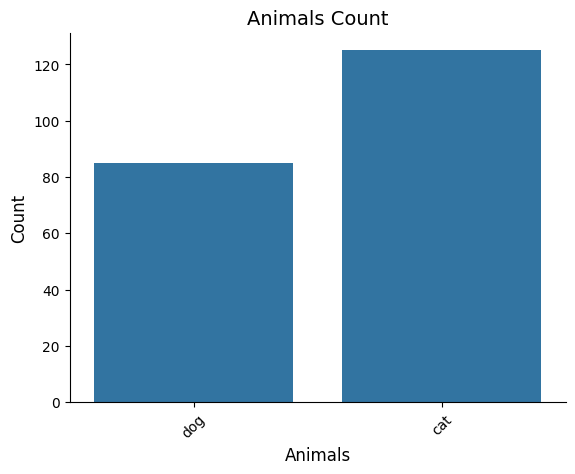

In [11]:
plt.title('Animals Count', size = 14)
filtered_final_df = data_df[data_df['animals']!='Unknown']

sns.countplot(data = filtered_final_df , x = 'animals')
plt.xlabel('Animals',size = 12)
plt.ylabel('Count' , size = 12)

# enhancing visualisation
sns.despine(top = True , right = True , bottom = False , left = False)
plt.xticks(rotation = 45)

plt.show()

In [12]:
# creating functions to display the plots

def waveplot_creation(data , sr , animal):
    plt.figure(figsize = (10,4))
    plt.title(f"{animal} Waveplot")

    librosa.display.waveshow(data , sr = sr)



def spectrogram_creation(data , sr , animal):
    plt.figure(figsize=(12,3))
    plt.title(f"{animal} Spectogram")


    S = librosa.stft(data) # short-time fourier transform
    Sdb = librosa.amplitude_to_db(S)

    librosa.display.specshow(Sdb , sr = sr ,  x_axis ='time' , y_axis = 'hz' )
    plt.colorbar()
    plt.tight_layout()

def melspectrogram_creation(data , sr , animal):
    plt.figure(figsize=(12,3))
    plt.title(f"{animal} Mel Spectrogram")

    MS = librosa.feature.melspectrogram(y = data , sr=sr)
    MSdb = librosa.power_to_db(MS)

    librosa.display.specshow(MSdb , sr = sr , x_axis ='time' , y_axis = 'mel' , cmap = 'viridis')
    plt.colorbar()
    plt.tight_layout()

<ipython-input-12-f1327111261a>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sdb = librosa.amplitude_to_db(S)


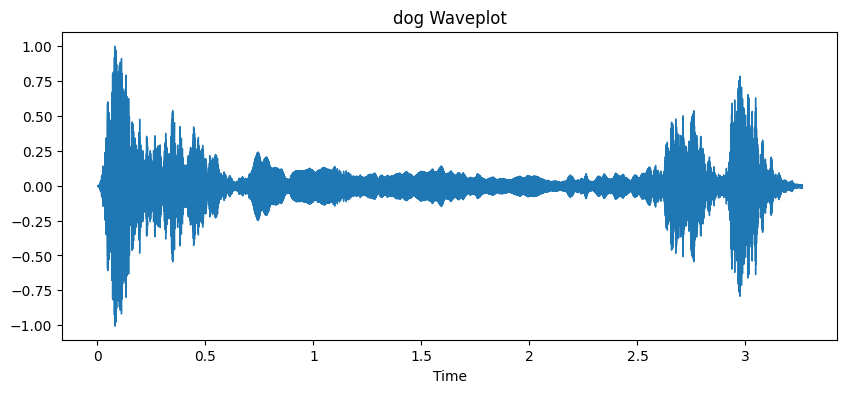

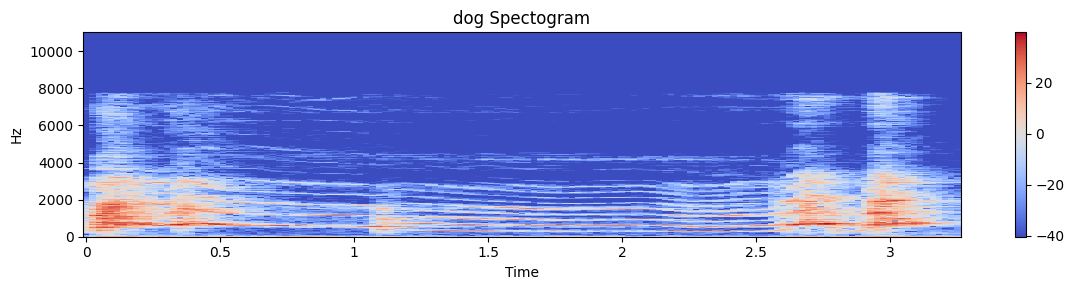

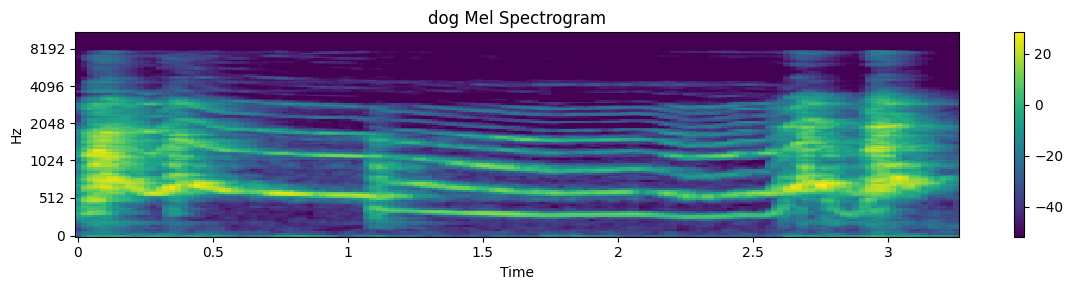

In [13]:
# to play the audio files
from IPython.display import Audio

animal = 'dog'

path = np.array(data_df.path)[1]
data , sampling_rate = librosa.load(path)

#invocation
waveplot_creation(data , sampling_rate , animal)
spectrogram_creation(data , sampling_rate , animal)
melspectrogram_creation(data , sampling_rate , animal)

Audio(path)

#Data Augmentation

In [87]:
# noise injection
def noise(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    # injecting gaussian noise to the data
    data = data + noise_ampl * np.random.normal(size = data.shape[0])
    # data.shape - a tuple that tells us about the dimension the data - [0]th has the number of elements.
    # it is important to ensure that the size of the noise array is the same as the audio data to maintain synchronization
    return data # the noise injected data

# time stretching
def stretch(data, rate=0.8):
    # Stretch or compress the audio data by the specified rate
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data
# time shifting
def time_shift(data):
    shift_range = int(np.random.uniform(low=-5,high=5)*1000) # converting to millisec - audio processing unit
    return np.roll(data,shift_range)


def pitch(data , sr , n_steps = 0.7):
    # 70% lower pitch
    return librosa.effects.pitch_shift(data,sampling_rate,n_steps)

path = np.array(data_df.path)[1]
data , sampling_rate = librosa.load(path)

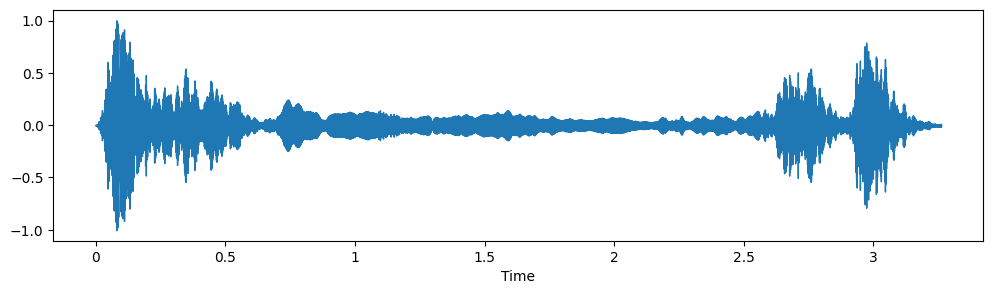

In [15]:
plt.figure(figsize = (12,3))
librosa.display.waveshow(y=data , sr = sampling_rate)

Audio(path)

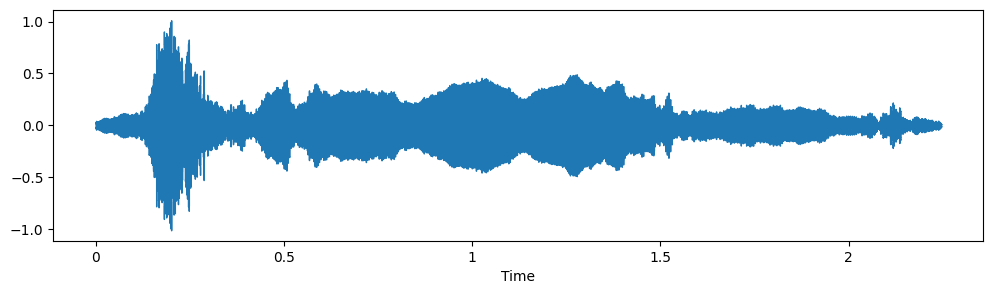

In [16]:
n = noise(data) # noise injected data
plt.figure(figsize=(12,3))
librosa.display.waveshow(y=n , sr = sampling_rate)
Audio(n , rate = sampling_rate)

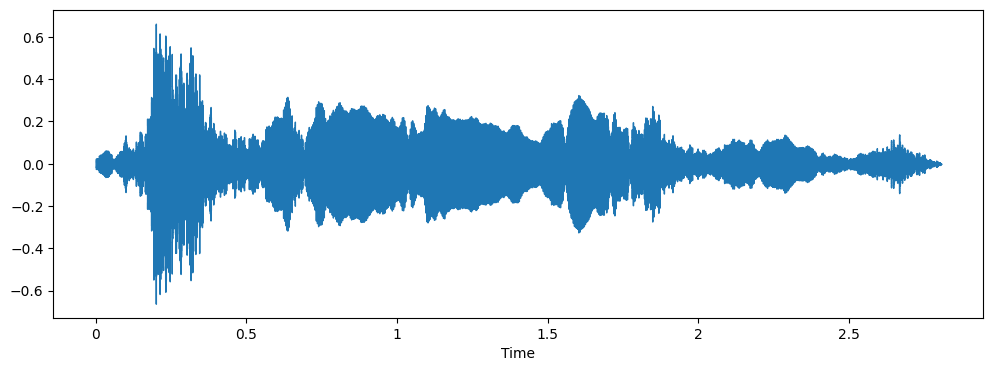

In [17]:
t_s = librosa.effects.time_stretch(data , rate = 0.8)


plt.figure(figsize=(12, 4))

librosa.display.waveshow(y=t_s, sr=sampling_rate)

Audio(t_s, rate=sampling_rate)

#Feature Extraction

In [88]:
def extract_features(data, sample_rate):
    result = np.array([])

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
#     data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=8025)

    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))

    stretched_data = librosa.effects.time_stretch(data , rate = 0.8)
    res3 = extract_features(stretched_data, sample_rate)
    result = np.vstack((result, res3))

    stretched_pitch_data = librosa.effects.pitch_shift(y=data ,sr=sampling_rate ,  n_steps = 0.7)
    res4 = extract_features(stretched_pitch_data, sample_rate)
    result = np.vstack((result,res4))

    return result

In [89]:
X, Y = [], []
print("Feature processing...")
for path, animals, ind in zip(data_df.path, data_df.animals, range(data_df.path.shape[0])):
    features = get_features(path)
    if ind % 500 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        Y.append(animals)
print(f"{data_df.path.shape[0]} samples has been processed...")
print("Done.")

Feature processing...
0 samples has been processed...
210 samples has been processed...
Done.


In [90]:
len(X), len(Y) , data_df.path.shape

(840, 840, (210,))

In [91]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv' ,index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,-324.123962,156.450775,-21.568672,-12.582067,-7.228817,-1.296403,3.217838,-0.276649,-12.118721,-6.356550,...,6.329612e-07,5.896990e-07,5.589998e-07,5.360911e-07,5.190404e-07,5.068334e-07,4.979789e-07,4.922763e-07,4.887202e-07,dog
1,-172.855058,48.334150,5.414292,-10.810676,-6.569422,-0.990939,-1.543807,-6.625423,-9.487560,-4.899718,...,1.048430e-02,1.002673e-02,1.037899e-02,1.049343e-02,1.024087e-02,1.000655e-02,1.061808e-02,1.081359e-02,1.035619e-02,dog
2,-356.533295,152.739304,-18.117823,-12.277125,-5.551356,-0.820668,3.540267,-1.663297,-11.821852,-7.380319,...,4.793765e-07,4.446845e-07,4.201839e-07,4.020044e-07,3.885634e-07,3.789744e-07,3.720669e-07,3.676184e-07,3.648748e-07,dog
3,-352.138885,151.756927,-23.443552,-11.218535,-4.928061,0.887728,4.438239,-2.498896,-12.872499,-5.786965,...,6.040649e-07,5.336832e-07,4.861444e-07,4.517769e-07,4.265171e-07,4.091921e-07,3.992736e-07,3.197615e-07,1.252068e-07,dog
4,-361.974792,126.749794,-46.503750,-28.803165,-7.314841,-17.174650,-15.729174,-5.776719,-16.108444,3.204832,...,2.387148e-07,2.190988e-07,2.050609e-07,1.945353e-07,1.866292e-07,1.808687e-07,1.766500e-07,1.738735e-07,1.721612e-07,dog


#Data Preparation

In [92]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [93]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#Splitting Data Into Training and Validation

In [94]:
x_train , x_val , y_train , y_val = train_test_split(X,Y, test_size = 0.2, shuffle = True)
x_train.shape , y_train.shape , x_val.shape , y_val.shape

((672, 148), (672, 2), (168, 148), (168, 2))

In [95]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_train.shape , y_train.shape , x_val.shape , y_val.shape


((672, 148), (672, 2), (168, 148), (168, 2))

In [96]:
x_train = np.expand_dims(x_train , axis = 2)
x_val = np.expand_dims(x_val , axis = 2)
x_train.shape , y_train.shape , x_val.shape , y_val.shape

((672, 148, 1), (672, 2), (168, 148, 1), (168, 2))

In [97]:
x_train.shape[1]

148

#CNN Model With 2 Convolution layers (Trial 1)

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

model = Sequential()

model.add(Conv1D(128 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(BatchNormalization())
model.add(Dense(128 , activation = 'relu'))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same'))

model.add(Conv1D(256 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(BatchNormalization())
model.add(Dense(64 , activation = 'relu'))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(32 , activation = 'relu'))
model.add(Dense(2 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics = ['accuracy'])


model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_68 (Conv1D)                   │ (None, 148, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_105              │ (None, 148, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 148, 128)            │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_47 (MaxPooling1D)      │ (None, 74, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_69 (Conv1D)                   │ (None, 74, 256)             │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_106              │ (None, 74, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 74, 64)              │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_48 (MaxPooling1D)      │ (None, 37, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 2368)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 32)                  │          75,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,234 (1.05 MB)

 Trainable params: 274,466 (1.05 MB)

 Non-trainable params: 768 (3.00 KB)

In [85]:
history = model.fit(x_train , y_train , batch_size = 64 , epochs = 50 , validation_data =(x_val,y_val))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 0.5829 - loss: 0.9197 - val_accuracy: 0.6190 - val_loss: 0.6020
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.8019 - loss: 0.4204 - val_accuracy: 0.8492 - val_loss: 0.5902
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.8784 - loss: 0.2975 - val_accuracy: 0.8492 - val_loss: 0.6002
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - accuracy: 0.9164 - loss: 0.2078 - val_accuracy: 0.8571 - val_loss: 0.5852
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.9382 - loss: 0.1605 - val_accuracy: 0.7222 - val_loss: 0.5742
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.9522 - loss: 0.1210 - val_accuracy: 0.8730 - val_loss: 0.5749
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.9842 - loss: 0.0744 - val_accuracy: 0.7857 - val_loss: 0.5721
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.9851 - loss: 0.0595 - val_accuracy: 0.7143 - val_loss:

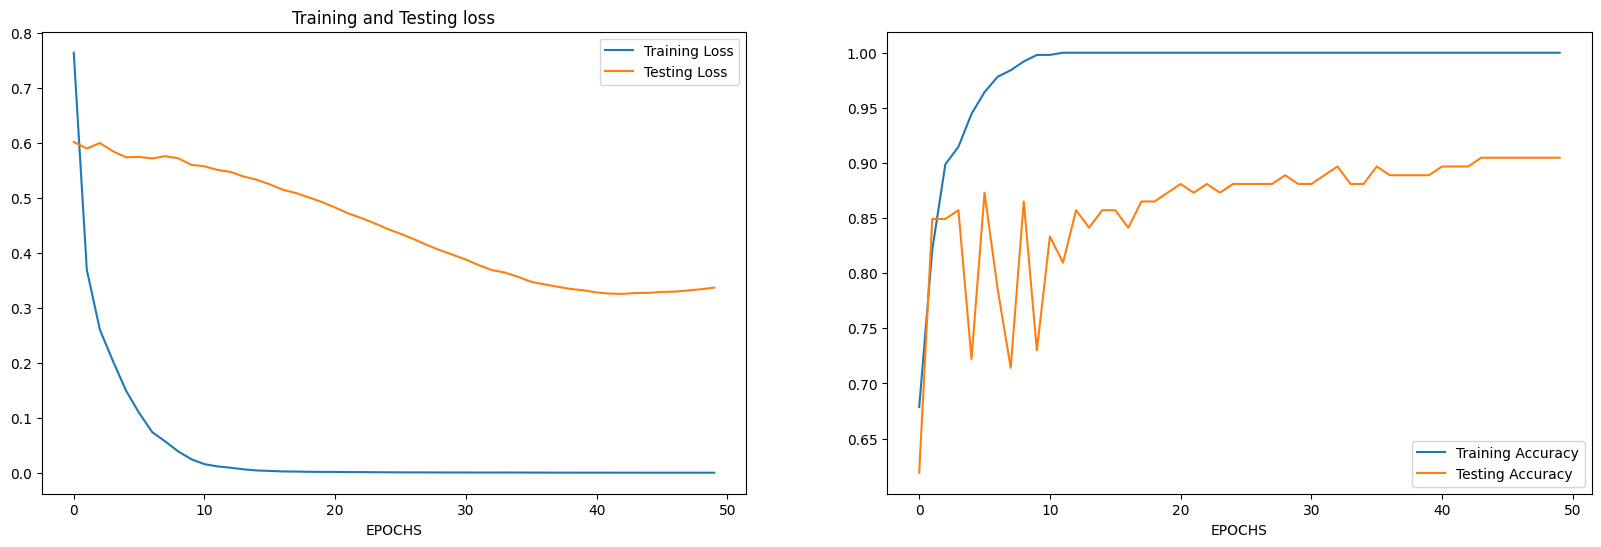

In [86]:
epochs = [i for i in range(50)] # as 50 epochs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss , label = 'Training Loss')
ax[0].plot(epochs, test_loss , label='Testing Loss')
ax[0].set_title('Training and Testing loss')
ax[0].legend()
ax[0].set_xlabel('EPOCHS')

ax[1].plot(epochs, train_acc , label='Training Accuracy')
ax[1].plot(epochs , test_acc , label ='Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('EPOCHS')
plt.show()

#Trial With More Data Augmentation

In [99]:
history = model.fit(x_train , y_train , batch_size = 64 , epochs = 50 , validation_data =(x_val,y_val))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.7246 - loss: 0.6259 - val_accuracy: 0.8095 - val_loss: 0.6099
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.8905 - loss: 0.2341 - val_accuracy: 0.7976 - val_loss: 0.5742
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.9319 - loss: 0.1591 - val_accuracy: 0.7560 - val_loss: 0.5697
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.9775 - loss: 0.0843 - val_accuracy: 0.7440 - val_loss: 0.5563
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.9852 - loss: 0.0536 - val_accuracy: 0.7679 - val_loss: 0.5529
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.9937 - loss: 0.0329 - val_accuracy: 0.7143 - val_loss: 0.5328
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.7083 - val_loss: 0.5297
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.9979 - loss: 0.0190 - val_accuracy: 0.

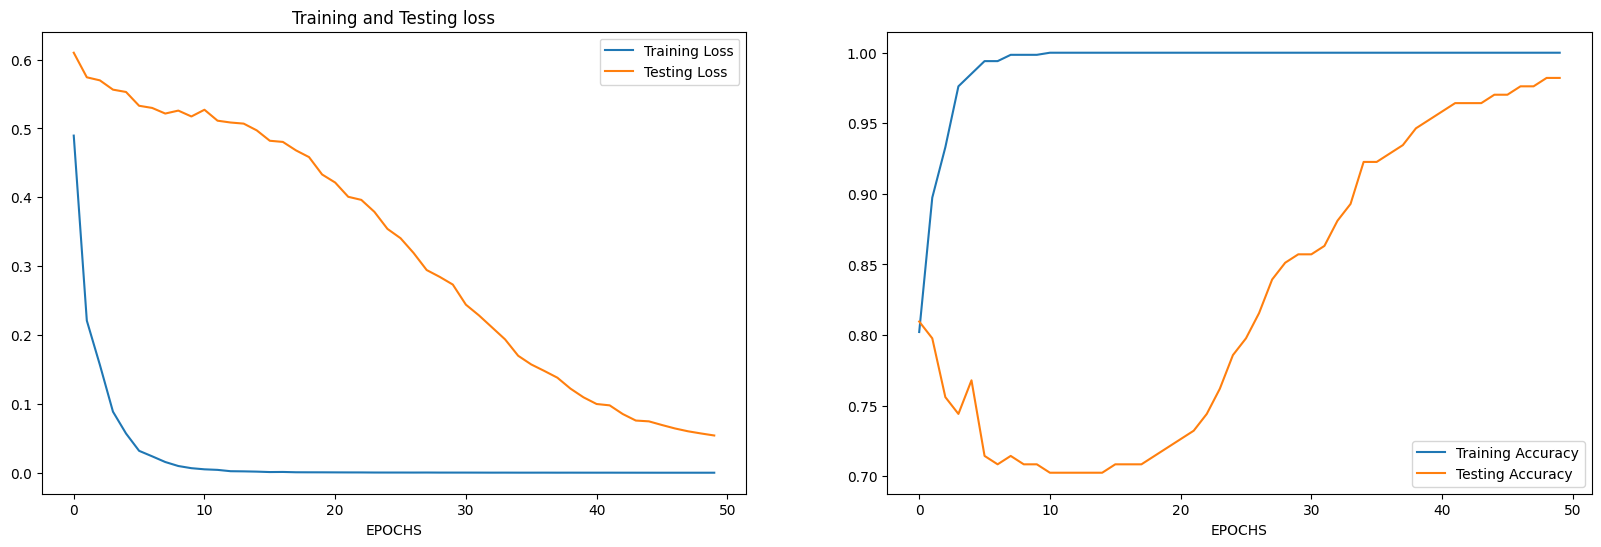

In [100]:
epochs = [i for i in range(50)] # as 50 epochs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss , label = 'Training Loss')
ax[0].plot(epochs, test_loss , label='Testing Loss')
ax[0].set_title('Training and Testing loss')
ax[0].legend()
ax[0].set_xlabel('EPOCHS')

ax[1].plot(epochs, train_acc , label='Training Accuracy')
ax[1].plot(epochs , test_acc , label ='Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('EPOCHS')
plt.show()

#CNN Model With 3 Convolution Layers (Best Trial)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

model = Sequential()

model.add(Conv1D(128 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(BatchNormalization())
model.add(Dense(128 , activation = 'relu'))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same'))

model.add(Conv1D(256 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(BatchNormalization())
model.add(Dense(64 , activation = 'relu'))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same'))

model.add(Conv1D(512 , kernel_size = 5 , strides = 1 , padding = 'same' , activation ='relu',
         input_shape=(x_train.shape[1],1)
         ))
model.add(BatchNormalization())
model.add(Dense(32 , activation = 'relu'))
model.add(MaxPooling1D(pool_size = 5 , strides = 2 , padding = 'same'))


model.add(Flatten())

model.add(Dense(32 , activation = 'relu'))
model.add(Dense(2 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics = ['accuracy'])


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 148, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 148, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 148, 128)            │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 74, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 74, 256)             │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 74, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 74, 64)              │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 37, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 37, 512)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 37, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 37, 32)              │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 608)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │          19,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401,730 (1.53 MB)

 Trainable params: 399,938 (1.53 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [102]:
history = model.fit(x_train , y_train , batch_size = 64 , epochs = 50 , validation_data =(x_val,y_val))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.6575 - loss: 0.8898 - val_accuracy: 0.7024 - val_loss: 0.6490
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.9082 - loss: 0.2489 - val_accuracy: 0.7560 - val_loss: 0.6263
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - accuracy: 0.9392 - loss: 0.1772 - val_accuracy: 0.7798 - val_loss: 0.6098
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 0.9824 - loss: 0.0743 - val_accuracy: 0.7798 - val_loss: 0.6054
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.9974 - loss: 0.0362 - val_accuracy: 0.7798 - val_loss: 0.5910
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.9986 - loss: 0.0182 - val_accuracy: 0.7619 - val_loss: 0.5790
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.9972 - loss: 0.0117 - val_accuracy: 0.8214 - val_loss: 0.5961
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.

#

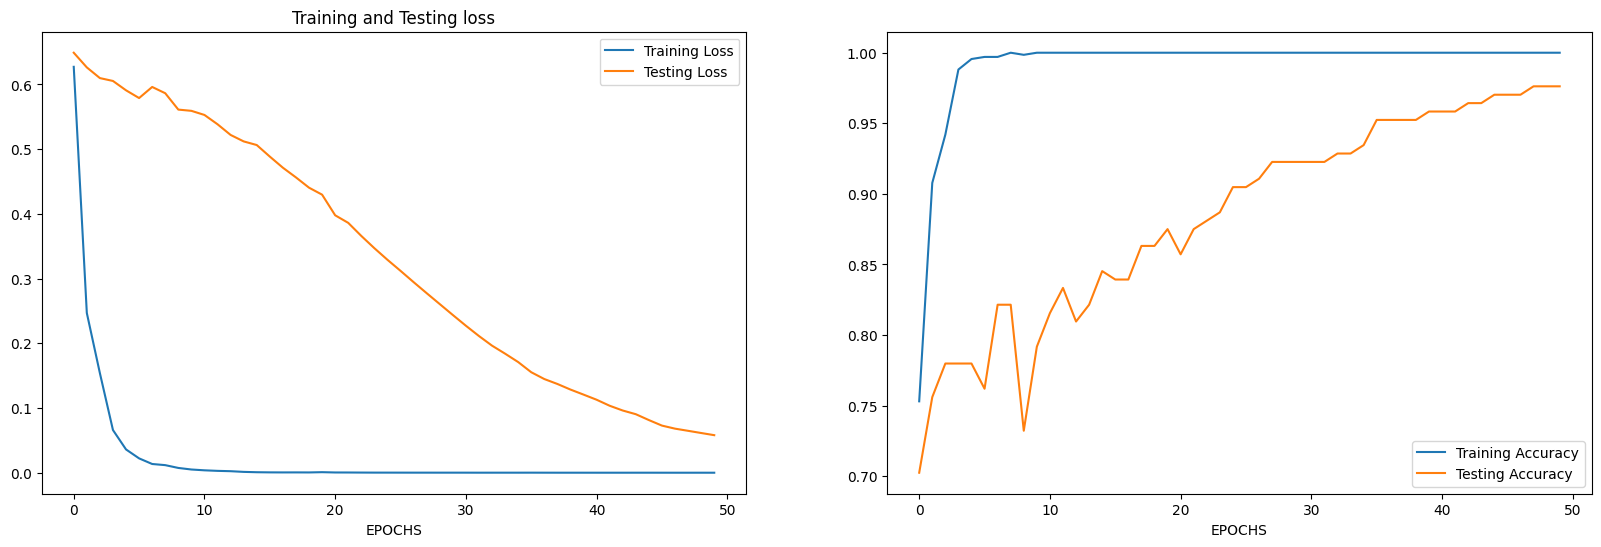

In [103]:
epochs = [i for i in range(50)] # as 50 epochs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss , label = 'Training Loss')
ax[0].plot(epochs, test_loss , label='Testing Loss')
ax[0].set_title('Training and Testing loss')
ax[0].legend()
ax[0].set_xlabel('EPOCHS')

ax[1].plot(epochs, train_acc , label='Training Accuracy')
ax[1].plot(epochs , test_acc , label ='Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('EPOCHS')
plt.show()

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Test Dataset

In [110]:
# Prepare lists to hold emotions and file paths
animals = []
paths = []

# Process each actor directory
for animal in directory_list:
    animal_path = os.path.join('/content/cats_dogs/test', animal)
    animal_files = os.listdir(animal_path)

    # Process each audio file in the actor's directory
    for audio_file in animal_files:

        # Append the emotion and file path to the respective lists
        animals.append(animal)
        paths.append(os.path.join(animal_path, audio_file))

# Create a DataFrame from the lists
data_df = pd.DataFrame({
    'animals': animals,
    'path': paths
})


# Display the first few and last few rows of the DataFrame together
head_and_tail = pd.concat([data_df.head(), data_df.tail()])
print("First and last few rows of the DataFrame:")
print(head_and_tail)

# Display a summary of the DataFrame
print("\nSummary of the DataFrame:")
print(data_df.describe(include='all'))

# Display the count of each emotion
animals_counts = data_df['animals'].value_counts()
print("\nCount of each animal:")
print(animals_counts)

First and last few rows of the DataFrame:
   animals                                             path
0      dog   /content/cats_dogs/test/dog/dog_barking_82.wav
1      dog   /content/cats_dogs/test/dog/dog_barking_64.wav
2      dog   /content/cats_dogs/test/dog/dog_barking_46.wav
3      dog  /content/cats_dogs/test/dog/dog_barking_112.wav
4      dog   /content/cats_dogs/test/dog/dog_barking_49.wav
62     cat           /content/cats_dogs/test/cat/cat_59.wav
63     cat           /content/cats_dogs/test/cat/cat_17.wav
64     cat           /content/cats_dogs/test/cat/cat_67.wav
65     cat           /content/cats_dogs/test/cat/cat_14.wav
66     cat          /content/cats_dogs/test/cat/cat_143.wav

Summary of the DataFrame:
       animals                                            path
count       67                                              67
unique       2                                              67
top        cat  /content/cats_dogs/test/dog/dog_barking_82.wav
freq        39     

In [111]:
data_df.to_csv("test_data_path.csv",index=False)

In [112]:
print(data_df.animals.value_counts())

animals
cat    39
dog    28
Name: count, dtype: int64


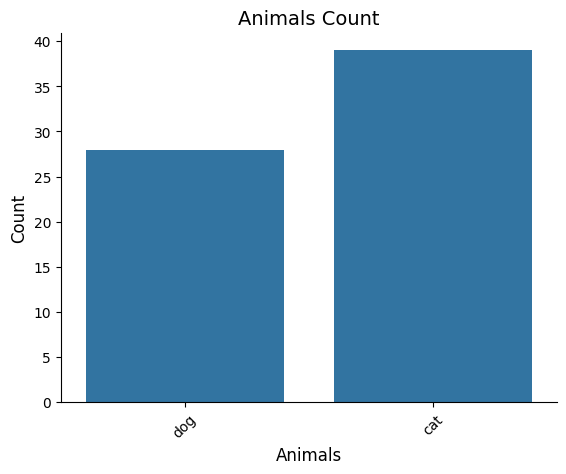

In [113]:
plt.title('Animals Count', size = 14)
filtered_final_df = data_df[data_df['animals']!='Unknown']

sns.countplot(data = filtered_final_df , x = 'animals')
plt.xlabel('Animals',size = 12)
plt.ylabel('Count' , size = 12)

# enhancing visualisation
sns.despine(top = True , right = True , bottom = False , left = False)
plt.xticks(rotation = 45)

plt.show()

In [114]:
# noise injection
def noise(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    # injecting gaussian noise to the data
    data = data + noise_ampl * np.random.normal(size = data.shape[0])
    # data.shape - a tuple that tells us about the dimension the data - [0]th has the number of elements.
    # it is important to ensure that the size of the noise array is the same as the audio data to maintain synchronization
    return data # the noise injected data

# time stretching
def stretch(data, rate=0.8):
    # Stretch or compress the audio data by the specified rate
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data
# time shifting
def time_shift(data):
    shift_range = int(np.random.uniform(low=-5,high=5)*1000) # converting to millisec - audio processing unit
    return np.roll(data,shift_range)


def pitch(data , sr , n_steps = 0.7):
    # 70% lower pitch
    return librosa.effects.pitch_shift(data,sampling_rate,n_steps)

path = np.array(data_df.path)[1]
data , sampling_rate = librosa.load(path)

In [115]:
def extract_features(data, sample_rate):
    result = np.array([])

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
#     data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=8025)

    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))

    stretched_data = librosa.effects.time_stretch(data , rate = 0.8)
    res3 = extract_features(stretched_data, sample_rate)
    result = np.vstack((result, res3))

    stretched_pitch_data = librosa.effects.pitch_shift(y=data ,sr=sampling_rate ,  n_steps = 0.7)
    res4 = extract_features(stretched_pitch_data, sample_rate)
    result = np.vstack((result,res4))

    return result

In [116]:
X, Y = [], []
print("Feature processing...")
for path, animals, ind in zip(data_df.path, data_df.animals, range(data_df.path.shape[0])):
    features = get_features(path)
    if ind % 500 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        Y.append(animals)
print(f"{data_df.path.shape[0]} samples has been processed...")
print("Done.")

Feature processing...
0 samples has been processed...
67 samples has been processed...
Done.


In [117]:
len(X), len(Y) , data_df.path.shape

(268, 268, (67,))

In [118]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('test_features.csv' ,index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,-361.817566,155.963470,-38.013596,-26.209028,-12.238324,-11.547761,-19.822716,-14.508486,-18.177748,-5.880949,...,0.000001,0.000001,0.000001,1.045076e-06,1.009356e-06,9.837129e-07,9.650967e-07,9.530654e-07,9.456024e-07,dog
1,-239.650787,60.041993,-2.048446,-21.038546,-13.118811,-9.167144,-11.625557,-14.577093,-13.621461,-4.653520,...,0.001874,0.001923,0.001945,1.809057e-03,1.873406e-03,1.748914e-03,1.903984e-03,1.924097e-03,1.879216e-03,dog
2,-395.423309,151.662598,-36.972603,-28.366135,-12.187572,-11.910775,-19.462811,-13.889392,-16.516333,-6.314979,...,0.000001,0.000001,0.000001,9.890988e-07,9.579023e-07,9.302118e-07,9.131213e-07,9.056932e-07,8.976999e-07,dog
3,-394.922729,150.492447,-43.859154,-28.058924,-11.424028,-13.328479,-20.062344,-14.007081,-15.410973,-2.162665,...,0.000001,0.000001,0.000001,9.369393e-07,8.866387e-07,8.539542e-07,8.401050e-07,6.906852e-07,3.007187e-07,dog
4,-344.676819,143.932800,-21.275057,-35.539566,-20.938972,-23.546959,-19.099880,-12.207488,-8.970562,-0.408405,...,0.000003,0.000003,0.000003,2.539164e-06,2.441519e-06,2.370836e-06,2.319284e-06,2.285587e-06,2.264780e-06,dog


In [119]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [120]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [121]:
scaler = StandardScaler()
x_test = scaler.fit_transform(X)
x_test.shape , Y.shape


((268, 148), (268, 2))

In [122]:
x_test = np.expand_dims(x_test , axis = 2)
x_test.shape , Y.shape

((268, 148, 1), (268, 2))

#Evaluation

In [129]:
print("Accuracy of the model on the test data : " , model.evaluate(x_test,Y)[1]*100,'%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8921 - loss: 0.4620
Accuracy of the model on the test data :  91.41790866851807 %


In [123]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(Y)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [124]:
pred_df = pd.DataFrame(columns=['Predicted Labels' ,'Actual Labels'])
pred_df['Predicted Labels'] = y_pred.flatten()
pred_df['Actual Labels'] = y_test.flatten()
pred_df.head(15)

,Predicted Labels,Actual Labels
0,dog,dog
1,cat,dog
2,cat,dog
3,dog,dog
4,dog,dog
5,dog,dog
6,dog,dog
7,dog,dog
8,dog,dog
9,dog,dog


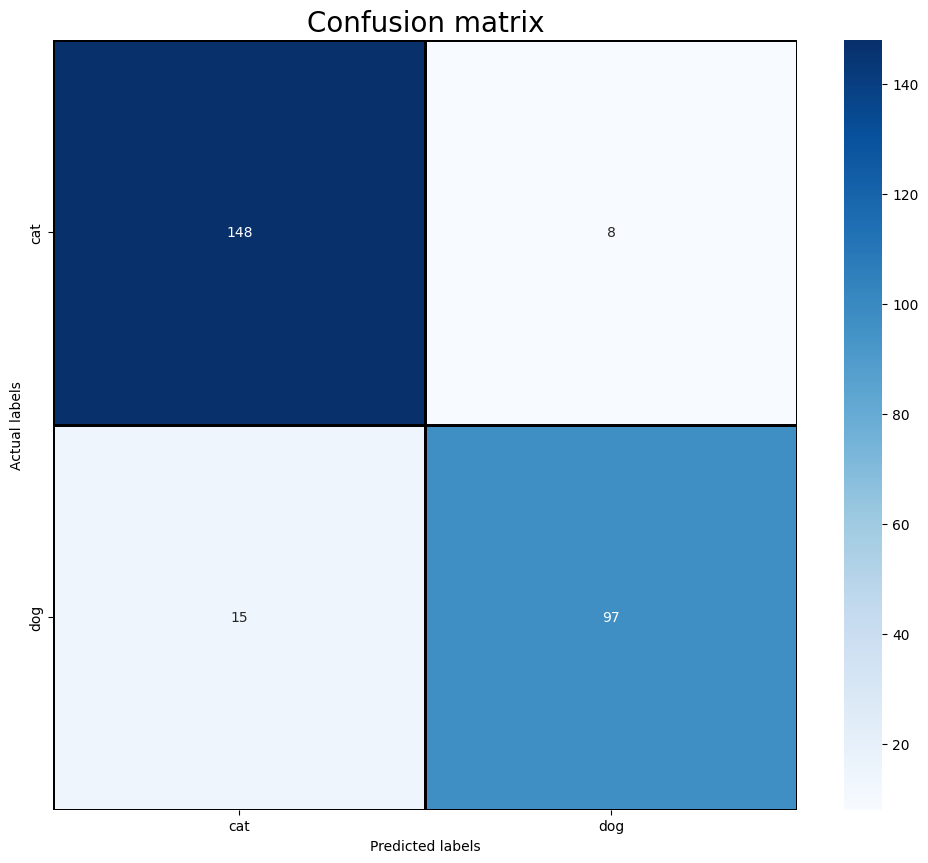

In [125]:
# Predict the values from the test set
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm , index =[i for i in encoder.categories_] , columns =[i for i in encoder.categories_])
sns.heatmap(cm , linecolor='black', cmap ='Blues' , linewidth=1, annot=True ,fmt='')
plt.title('Confusion matrix' , size = 20)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [130]:
model.save('my_model.h5')

In [131]:
from keras.models import load_model
loaded_model = load_model('my_model.h5')

In [132]:
print("Accuracy of the model on the test data : " , loaded_model.evaluate(x_test,Y)[1]*100,'%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8921 - loss: 0.4620
Accuracy of the model on the test data :  91.41790866851807 %
